<h1 align="center"><font color="yellow">Pytorch: Deep Learning</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Tutorial: Deep Learning and Neural Networks with Python and Pytorch](https://www.youtube.com/watch?v=BzcBsTou0C0&list=PLQVvvaa0QuDdeMyHEYc0gxFpYwHY2Qfdh&index=1)

# Setup e baixando nosso Dados

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

"""Lembra que são Imagens de 28x28"""
train = datasets.MNIST('datatrain', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('datateste', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [2]:
trainset = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=16, shuffle=False)

In [3]:
for data in trainset:
    print(data)
    break # É usado para interromper o loop após a primeira iteração.

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

<font color="orange">Cada iteração conterá um lote de 16 elementos.</font>

In [4]:
X, y = data[0][0], data[1][0]

`data[0]` é um monte de features para as coisas e `data[1]` são todas as targets. Então:

In [5]:
print(data[1])

tensor([1, 7, 4, 8, 7, 1, 6, 8, 0, 8, 4, 5, 8, 8, 0, 1])


In [6]:
y

tensor(1)

In [7]:
data[0][0].shape

torch.Size([1, 28, 28])

<font color="orange">Como você pode ver, `data[1]` é apenas um monte de `Labels`. Então, como `data[1][0]` é um `1`, podemos esperar `data[0][0]` ser uma `imagem de um 1`. </font>

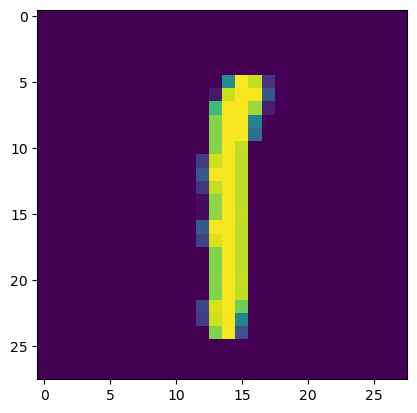

In [8]:
import matplotlib.pyplot as plt 

plt.imshow(data[0][0].view(28,28)) # Aqui redimensionamos a Imagem para poder visualizar ela.
plt.show()


<font color="orange">Podemos verificar e ter mais algumas dúvidas:</font>

* Temos nossos dados de várias features e suas respectivas classes.
* Esses dados são todos numéricos.
* Embaralhamos os dados.
* Dividimos os dados em grupos de `Treinamento` e `Teste`.

* Os dados são dimensionados (`scaled`)?
* Os dados estão balanceados (`balanced`)?


<font color="orange">Parece que temos mais algumas perguntas para responder. 

* Em primeiro lugar, `é escalado?` Lembre-se de que a rede neural gosta que os dados sejam dimensionados entre `0 e 1` ou `-1 e 1`. Dados de imagens brutas geralmente são `RGB`, onde cada pixel é uma tupla de valores de `0 a 255`, o que é um problema. `0 a 255` não é escalado. `Que tal nosso conjunto de dados aqui?` `É 0-255?` ou `já está escalado para nós?` 


Vejamos algumas linhas:</font>

In [9]:
data[0][0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

Hum, está vazio. Faz sentido, as primeiras linhas estão em branco provavelmente em muitas imagens. O `1` acima certamente é.

In [11]:
data[0][0][0][5]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4980, 1.0000, 0.9098, 0.1490,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

<font color="orange">Podemos observar, claramente, que nossos dados já estão `dimensionados` para nós.</font>

. . . No mundo real, não será assim não 🤣🤣🤣

<font color="red">O que é balanceamento de dados?</font>

Lembre-se, se não embaralharmos nossos dados, a máquina aprenderá coisas como quais foram as últimas centenas de classes seguidas e provavelmente apenas preverá isso a partir daí.

Bem, com o `balanceamento de dados`, algo semelhante pode ocorrer.

Imagine que você tenha um conjunto de dados de `cães` e `gatos`. <font color="pink">7200 imagens são de cães</font> e <font color="green">1800 são de gatos</font>. Este é um grande desequilíbrio. É altamente provável que o classificador descubra que pode chegar rápida e facilmente a uma `accuracy de 72%` com uma simples previsão `sempre dog`. É altamente improvável que o modelo se recupere de algo assim.


Outras vezes, o desequilíbrio não é tão grave, mas ainda o suficiente para fazer com que o modelo quase sempre preveja uma determinada maneira, exceto nos casos mais óbvios. De qualquer forma, é melhor se pudermos equilibrar o conjunto de dados.

Por `"equilíbrio"`, quero dizer garantir que haja o mesmo número de exemplos para cada classificação no treinamento.

Às vezes, isso simplesmente não é possível. Existem maneiras de lidar com isso com ponderação de classe especial para o otimizador anotar, mas mesmo isso nem sempre funciona. Pessoalmente, nunca tive sucesso com isso em nenhum aplicativo do mundo real.

<font color="orange">No nosso caso, `como podemos confirmar o equilíbrio dos dados?` Bem, só precisamos repetir tudo e fazer uma contagem. Bem simples:</font>

In [14]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total = total + 1 # ou -->  total += 1


print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")
    

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


<font color="orange">Talvez haja outra maneira de fazer isso. Você pode pesquisar e ver se é possível fazer isso com `torchvision`. Podemos observar que nossos Dados estão ótimos, ou seja, eles não estão desbalanceados drásticamente não.</font>

# <font color="red">Criando uma `Neural Network`</font>

In [22]:
import torch.nn as nn # Camadas de NN (Totalmente conectadas, recorrentes, CNN (para Imagens), etc)
import torch.nn.functional as F # Funções de Ativação, etc


class Net(nn.Module):

    def __init__(self):
        super().__init__() # Se você esquecer está linha o erro será --> AttributeError: cannot assign module before Module.__init__() call
        self.fc1 = nn.Linear(28*28, 64) # Lembra --> A nossa imagem é 28x28. Você passa para a NN achatada (Flatten) 784.
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    
    def forward(self, x):
        x = F.relu(self.fc1(x)) # As funções são aplicadas no lado direito das camadas FCs.
        x = F.relu(self.fc2(x)) # As funções de ativação para adicionar não-linearidades 
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) # log_softmax (frequentemente usada em tarefas de Classificação, em nosso caso Multiclasse) é para converter as saídas em uma distribuição de Probabilidades
                                       # dim=1 --> Indica que a função deve ser aplicada ao longo da dimensão 1, que é a dimensão das classes ou rótulos.     


# Instanciamos nosso Modelo, nossa Classe:
net = Net()
print(net)



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


<font color="orange">Neste ponto, temos uma Rede Neural para a qual podemos passar dados, e ela nos dará uma saída. Vamos ver. Vamos apenas criar uma imagem aleatória:</font>

In [26]:
X = torch.randn((28, 28))

In [ ]:
X

<font color="orange">Então, isso é como nossas imagens, um tensor (array) de `28x28` de valores variando de `0 a 1`. Nossa Rede Neural quer que seja `flattened`, porém:</font>

In [28]:
X = X.view(-1,28*28) # Preste atenção no -1

In [ ]:
X

<font color="orange">Você deve entender a parte `28*28`, mas <font color="red">por que o `-1` inicial?</font>

Espera-se que qualquer entrada e saída para nossa rede neural seja um grupo de conjunto de Features.

Mesmo que você pretenda passar apenas `1` conjunto de recursos, ainda precisará passá-lo como uma `"lista"` de recursos.

Em nosso caso, realmente queremos apenas um `1x784`, e poderíamos dizer isso, mas você será mais frequentemente `-1` usado nessas formas. `Por que?` `-1` sugere `"qualquer tamanho"`. Então pode ser `1, 12, 92, 15295... etc`. É uma maneira prática de esse `bit` ser variável. Nesse caso, a parte variável é por quantas `"amostras"` passaremos.</font>

In [30]:
output = net(X)

<font color="orange">`O que devemos esperar que seja a saída?` Deve ser um tensor que contém um tensor de nossas `10` classes possíveis:</font>

In [31]:
# Com isto verificamos que a função `forward` está funcionando bem.
output

tensor([[-2.3759, -2.2699, -2.2933, -2.2171, -2.3031, -2.3721, -2.2877, -2.2051,
         -2.3237, -2.3967]], grad_fn=<LogSoftmaxBackward0>)

# <font color="red">Treinando a nossa `Neural Network`</font>

Felizmente para nós, os `"dados"` que estamos usando do `Pytorch` são, na verdade, objetos sofisticados que estão facilitando nossa vida no momento. Já está em `lotes` bonitos e só precisamos iterar sobre isso. Em seguida, queremos calcular a `Loss` e especificar nosso `Optimizer` (otimizador):

In [33]:
import torch.optim as optim 

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3) # O método .parameters() é útil para acessar e manipular os parâmetros do modelo.


In [34]:
loss_function

CrossEntropyLoss()

In [35]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [36]:
EPOCHS = 3

for epoch in range(EPOCHS): # 3 passes completos sobre os dados
    for data in trainset:  # `data` é um batch de dados
        X, y = data # `X` é o batch de features, `y` é o batch de Targets
        net.zero_grad() # Define os Gradientes como 0 antes do cálculo da Loss. Você provavelmente fará isso a cada etapa.
        output = net(X.view(-1, 784)) # Passe no batch reshape (lembre-se que são 28x28)
        loss = F.nll_loss(output, y) # Calcule e pegue o valor da Loss  
        loss.backward() # Aplique esta Loss backwards (para trás) através dos parâmetros da rede 
        optimizer.step() # Tenta otimizar pesos para contabilizar Loss/Gradients
    
    print(loss) # Printamos a Loss. Esperamos que a Loss (uma medida do que está errado) diminua!  


tensor(0.0299, grad_fn=<NllLossBackward0>)
tensor(0.2358, grad_fn=<NllLossBackward0>)
tensor(0.0252, grad_fn=<NllLossBackward0>)


Então, para cada época e para cada lote em nosso conjunto de dados, `o que fazemos?` ... em resumo, fazemos o seguinte:

* Pegamos as features (`X`) e Labels (`y`) do batch atual

* Zeramos os gradientes (`net.zero_grad`)

<font color="orange">É importante fazer isto (`net.zero_grad`) para cada etapa, para não ter gradientes adicionais que foram calculados em passos anteriores.</font>

* Passamos os dados por nossa Rede Neural (nosso Modelo)

* Calculamos a Loss

* Ajustamos os pesos na rede com a esperança de diminuir a Loss


À medida que iteramos, obtemos a Loss, que é uma métrica importante, mas nos preocupamos com a accuracy. Então `como fomos?` Para testar isso, tudo o que precisamos fazer é iterar em nosso `conjunto de teste`, medindo a exatidão comparando a saída com os valores alvos.

In [37]:
correct = 0
total = 0

with torch.no_grad(): # Não calcular o Gradiente ... já que só queremos saber apenas os certos e errados.
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.969


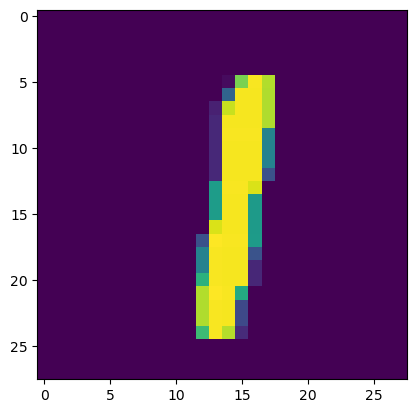

In [38]:
import matplotlib.pyplot as plt


plt.imshow(X[0].view(28, 28))
plt.show()

In [54]:
print('\033[93mA previsão é:\033[0m', torch.argmax(net(X[0].view(-1, 784))[0]))


A previsão é: tensor(1)


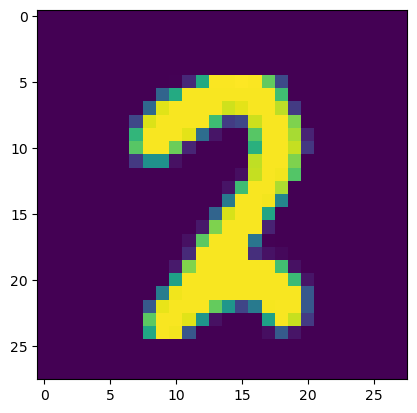

In [41]:
import matplotlib.pyplot as plt


plt.imshow(X[1].view(28, 28))
plt.show()


In [53]:
print('\033[93mA previsão é:\033[0m', torch.argmax(net(X[1].view(-1, 784))[0]))

A previsão é: tensor(2)
